In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#data.columns.str.lower().str.replace(' ', '_')

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

### EDA

   * Load the data.
   * Look at the median_house_value variable. Does it have a long tail?

### Features

For the rest of the homework, you'll need to use only these columns:

* 'latitude',
* 'longitude',
* 'housing_median_age',
* 'total_rooms',
* 'total_bedrooms',
* 'population',
* 'households',
* 'median_income',
* 'median_house_value'

Select only them.

In [4]:
data = data[data.columns[:9]]

### Question 1

Find a feature with missing values. How many missing values does it have?

* 207
* 307
* 408
* 508


In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable 'population'?

* 1133
* 1122
* 1166
* 1188


In [6]:
np.median(data["population"])

1166.0

### Split the data

1) Shuffle the initial dataset, use seed 42.
2) Split your data in train/val/test sets, with 60%/20%/20% distribution.
3) Make sure that the target value ('median_house_value') is not in your dataframe.
4) Apply the log transformation to the median_house_value variable using the np.log1p() function.

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

### Options:

* With 0
* With mean
* Both are equally good

In [7]:
np.random.seed(42)

# longitude of the dataset
n = len(data)

# Split your data in train/val/test sets, with 60%/20%/20% distribution
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# create a sequence arrange of numbers from zero to n
idx = np.arange(n)

# next we shuffle our index arrange randomly
np.random.shuffle(idx)

# show the dataset shuffled by the random index previously created
data_shuffled = data.iloc[idx]

# finally we can create the datasets in a way that allow us to see all kind of values in every single one
data_train = data_shuffled.iloc[:n_train].copy()
data_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
data_test = data_shuffled.iloc[n_train+n_val:].copy()

In [8]:
y_train_orig = data_train.median_house_value.values
y_val_orig = data_val.median_house_value.values
y_test_orig = data_test.median_house_value.values

# Applying  the log transformation to the median_house_value variable
y_train = np.log1p(data_train.median_house_value.values)
y_val = np.log1p(data_val.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

# removing target variable from the datasets
del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']

In [9]:
X_train_0 = data_train.fillna(0)
X_train_1 = data_train.fillna(np.mean(data_train["total_bedrooms"]))

In [10]:
# LINEAR REGRESSION
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [27]:
w_0_0, w_0 = train_linear_regression(X_train_0, y_train)
y_pred_0 = w_0_0 + X_train_0.dot(w_0)

In [28]:
w_1_1, w_1 = train_linear_regression(X_train_1, y_train)
y_pred_1 = w_1_1 + X_train_1.dot(w_1)

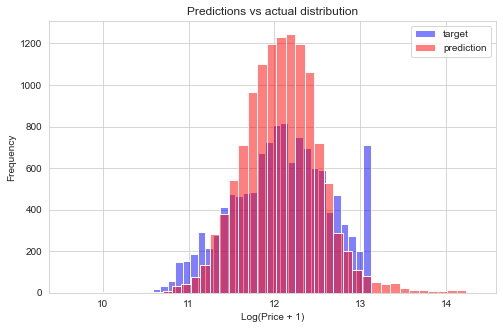

In [30]:
plt.figure(figsize=(8, 5))

sns.histplot(y_train, label='target', color='blue', alpha=0.5, bins=40)
sns.histplot(y_pred_0, label='prediction', color='red', alpha=0.5, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

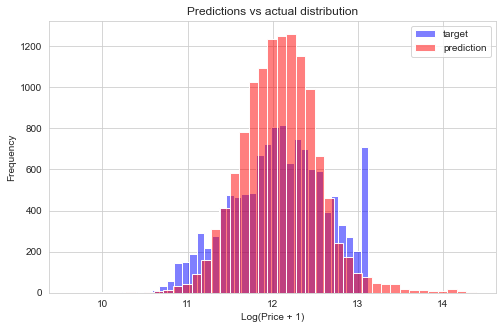

In [31]:
plt.figure(figsize=(8, 5))

sns.histplot(y_train, label='target', color='blue', alpha=0.5, bins=40)
sns.histplot(y_pred_1, label='prediction', color='red', alpha=0.5, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [32]:
w_0_0, w_0 = train_linear_regression(data_val, y_val)
y_pred_0 = w_0_0 + data_val.dot(w_0)

w_1_1, w_1 = train_linear_regression(data_val, y_val)
y_pred_1 = w_1_1 + data_val.dot(w_1)

In [68]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [66]:
rmse(y_val, y_pred_0) ==  rmse(y_val, y_pred_1)

True

### Question 4

Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

* 0
* 0.000001
* 0.001
* 0.0001


In [36]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [62]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train_0, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' %(r, w_0, w[1], w[7]))

    0, -11.69, -0.28, 0.17
0.001, -11.67, -0.28, 0.17
 0.01, -11.53, -0.28, 0.17
  0.1, -10.27, -0.27, 0.17
    1, -4.92, -0.22, 0.18
   10, -0.79, -0.18, 0.19


In [73]:
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train_0, y_train, r=r)
    y_pred_y = w_0 + data_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred_y))


 1e-06 0.32953303616480745
0.0001 0.329533000970351
 0.001 0.32953270386707445
  0.01 0.3295319365992358
   0.1 0.3296947205395416
     1 0.33378872200117354
     5 0.3392485345504313
    10 0.34060638078100564


In [74]:
w_0, w = train_linear_regression_reg(X_train_0, y_train, r=0.01)

X_val = data_val
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred).round(2))

X_test = data_test
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred).round(2))

validation: 0.33
test: 0.35


### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

        * Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same.
        * If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:

* 0.16
* 0.00005
* 0.005
* 0.15555


In [107]:
a = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)

    n = len(data)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)

    np.random.shuffle(idx)

    data_shuffled = data.iloc[idx]

    data_train = data_shuffled.iloc[:n_train].copy()
    data_val = data_shuffled.iloc[n_train:n_train + n_val].copy()
    data_test = data_shuffled.iloc[n_train + n_val:].copy()

    y_train = np.log1p(data_train.median_house_value.values)
    y_val = np.log1p(data_val.median_house_value.values)
    y_test = np.log1p(data_test.median_house_value.values)


    del data_train['median_house_value']
    del data_val['median_house_value']
    del data_test['median_house_value']

    X_train_0 = data_train.fillna(0)


    # LINEAR REGRESSION
    def train_linear_regression(X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w = XTX_inv.dot(X.T).dot(y)

        return w[0], w[1:]

    w_0_0, w_0 = train_linear_regression(X_train_0, y_train)
    y_pred_0 = w_0_0 + X_train_0.dot(w_0)


    def rmse(y, y_pred):
        error = y_pred - y
        mse = (error ** 2).mean()
        return np.sqrt(mse)

    y_pred_val = w_0_0 + data_val.dot(w_0)
    a.append(rmse(y_val, y_pred_val))

np.std(a).round(3)


0.004

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* 0.35
* 0.135
* 0.450
* 0.245


In [115]:
np.random.seed(9)

n = len(data)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)

np.random.shuffle(idx)

data_shuffled = data.iloc[idx]

data_train = data_shuffled.iloc[:n_train].copy()
data_val = data_shuffled.iloc[n_train:n_train + n_val].copy()
data_test = data_shuffled.iloc[n_train + n_val:].copy()

y_train = np.log1p(data_train.median_house_value.values)
y_val = np.log1p(data_val.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

y_full_train = np.concatenate([y_train, y_val])

del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']

full_data_train = pd.concat([data_train, data_val])

X_full_train = full_data_train.fillna(0)


def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

w_0_0, w_0 = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
y_pred_0 = w_0_0 + data_test.dot(w_0)


def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

y_pred_test = w_0_0 + data_test.dot(w_0)
rmse(y_test, y_pred_test).round(3)

0.345